<a href="https://colab.research.google.com/github/SANKARM18/computer-vision/blob/main/unit1-Classical%20Image%20Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub opencv-python matplotlib numpy

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
dataset_path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Dataset downloaded at:", dataset_path)

Using Colab cache for faster access to the 'intel-image-classification' dataset.
Dataset downloaded at: /kaggle/input/intel-image-classification


In [ ]:
train_folder = os.path.join(dataset_path, "seg_train", "seg_train")
sample_image_path = os.path.join(train_folder, "forest", "10039.jpg")
if not os.path.exists(sample_image_path):
    sample_image_path = os.path.join(train_folder, "forest", os.listdir(os.path.join(train_folder, "forest"))[0])

img = cv2.imread(sample_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
print(os.listdir(train_folder))

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [ ]:
def apply_mean_filter(img, ksize=5):
    return cv2.blur(img, (ksize, ksize))

def apply_gaussian_filter(img, ksize=5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def apply_sobel_filter(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(sobel)

def apply_prewitt_filter(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    prewittx = cv2.filter2D(gray, -1, kernelx)
    prewitty = cv2.filter2D(gray, -1, kernely)
    prewitt = cv2.magnitude(np.float32(prewittx), np.float32(prewitty))
    return cv2.convertScaleAbs(prewitt)

In [ ]:
mean_filtered = apply_mean_filter(img)
gaussian_filtered = apply_gaussian_filter(img)
sobel_filtered = apply_sobel_filter(img)
prewitt_filtered = apply_prewitt_filter(img)

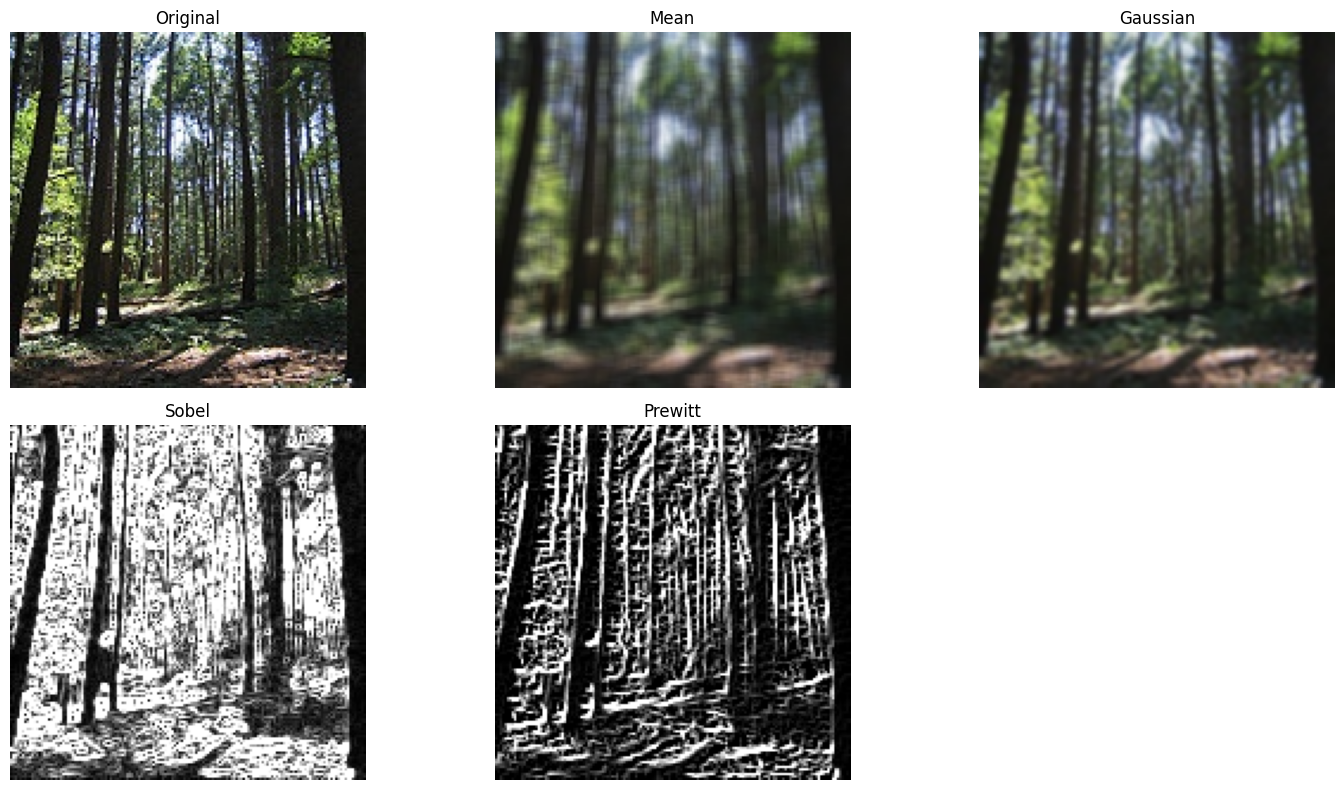

In [ ]:
titles = ['Original','Mean','Gaussian','Sobel','Prewitt']
images = [img, mean_filtered, gaussian_filtered, sobel_filtered, prewitt_filtered]

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,3,i+1)
    cmap = 'gray' if len(images[i].shape)==2 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()